In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools

from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler

#read pic
image_path = '/content/drive/MyDrive/Covid19-dataset/test/Covid/01.jpeg'
image = cv.imread(image_path)

#resize
resize_image = cv.resize(image,(224,224))

# convert to numpy array
reshaped_arr = np.array(resize_image)
print(reshaped_arr)

[[[ 9  9  9]
  [ 7  7  7]
  [ 6  6  6]
  ...
  [ 7  7  7]
  [ 8  8  8]
  [13 13 13]]

 [[ 7  7  7]
  [ 8  8  8]
  [ 4  4  4]
  ...
  [ 2  2  2]
  [ 7  7  7]
  [ 9  9  9]]

 [[ 7  7  7]
  [ 5  5  5]
  [ 3  3  3]
  ...
  [ 5  5  5]
  [ 6  6  6]
  [ 7  7  7]]

 ...

 [[ 0  0  0]
  [ 4  4  4]
  [ 0  0  0]
  ...
  [ 5  5  5]
  [ 5  5  5]
  [ 7  7  7]]

 [[ 0  0  0]
  [ 1  1  1]
  [ 0  0  0]
  ...
  [ 5  5  5]
  [ 5  5  5]
  [ 6  6  6]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 1  1  1]
  ...
  [ 8  8  8]
  [ 8  8  8]
  [ 8  8  8]]]


In [ ]:
print(image.shape)

(3480, 4248, 3)


In [ ]:
print(reshaped_arr.shape)

(224, 224, 3)


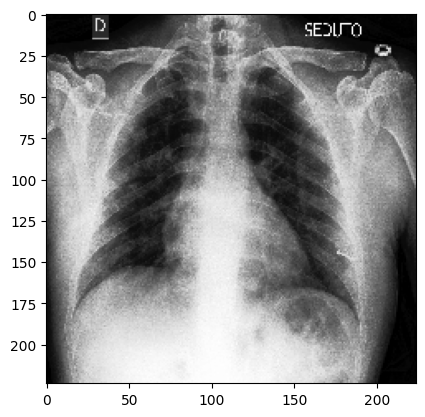

In [ ]:
plt.imshow(reshaped_arr)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reshaped_arr = reshaped_arr.reshape(1,-1)

In [ ]:
#reshaped_arr.shape

In [ ]:
import os #ช่วยให้คุณสามารถจัดการไฟล์และโฟลเดอร์ สร้างและลบไฟล์
Covidlist = sorted(os.listdir('/content/drive/MyDrive/Covid19-dataset/train/Covid'))
Normal = sorted(os.listdir('/content/drive/MyDrive/Covid19-dataset/train/Normal'))
Viral_Pneumonia = sorted(os.listdir('/content/drive/MyDrive/Covid19-dataset/train/Viral Pneumonia'))
class_names = sorted(os.listdir('/content/drive/MyDrive/Covid19-dataset/train/'))
#print(class_names)

In [ ]:
x = list()
y = list()
for i in tqdm(Covidlist,desc='Covidlist'):
  image = cv.imread('/content/drive/MyDrive/Covid19-dataset/train/Covid/'+i)
  image = cv.resize(image,(224,224))
  image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  x.append(image.reshape(-1,224*224))
  y.append(0)

for i in tqdm(Viral_Pneumonia,desc='Viral_Pneumonia'):
  image = cv.imread('/content/drive/MyDrive/Covid19-dataset/train/Viral Pneumonia/'+i)
  image = cv.resize(image,(224,224))
  image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  x.append(image.reshape(-1,224*224))
  y.append(2)

for i in tqdm(Normal,desc='😎'):
  image = cv.imread('/content/drive/MyDrive/Covid19-dataset/train/Normal/'+i)
  image = cv.resize(image,(224,224))
  image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  print(image.shape)
  x.append(image.reshape(-1,224*224))#ปรับให้ Row บาล่านกัน
  y.append(1)
data = list(zip(x,y))# ทำให้สะดวกขึ้นใน Colab

Covidlist:   0%|          | 0/70 [00:00<?, ?it/s]

Viral_Pneumonia:   0%|          | 0/70 [00:00<?, ?it/s]

😎:   0%|          | 0/70 [00:00<?, ?it/s]

In [ ]:
testCovid = sorted(os.listdir('/content/drive/MyDrive/Covid19-dataset/test/Covid'))
testNormal =  sorted(os.listdir('/content/drive/MyDrive/Covid19-dataset/test/Normal'))
testViral_Pneumonia =  sorted(os.listdir('/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia'))

In [ ]:
x1 = list()
y1 = list()
for i in tqdm(testNormal,desc='testNormal'):
  image = cv.imread('/content/drive/MyDrive/Covid19-dataset/test/Normal/'+i)
  image = cv.resize(image,(224,224))
  image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  x1.append(image)
  y1.append(1)

for i in tqdm(testViral_Pneumonia,desc='testViral_Pneumonia'):
  image = cv.imread('/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia/'+i)
  image = cv.resize(image,(224,224))
  image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  x1.append(image)
  y1.append(2)

for i in tqdm(testCovid,desc='testCovid'):
  image = cv.imread('/content/drive/MyDrive/Covid19-dataset/test/Covid/'+i)
  image = cv.resize(image,(224,224))
  image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  x1.append(image)
  y1.append(0)


testNormal:   0%|          | 0/20 [00:00<?, ?it/s]

testViral_Pneumonia:   0%|          | 0/20 [00:00<?, ?it/s]

testCovid:   0%|          | 0/67 [00:00<?, ?it/s]

In [ ]:
X_test = np.array(x1).reshape((-1,224*224))
y_test = np.array(y1)
np.random.shuffle(data) #เขย่า
print(X_test.shape)

(107, 50176)


In [ ]:
print(X_test[:5])

[[ 3  3  3 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [22 23 25 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [ ]:
data[0]

(array([[50,  0,  0, ..., 34,  8,  4]], dtype=uint8), 0)

In [ ]:
#type(data[:][0])
X_train = list()
y_train = list()
for i in data:
  X_train.append(i[0]) # array
  y_train.append(i[1]) # class


In [ ]:

X_train=np.squeeze(X_train) # ตัวมิติ จาก 3 มิติ เหลือ 2 มิติ
np.ndim(X_train)

2

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100,128,100),batch_size= 64,max_iter=50,verbose=True)

In [ ]:
from sklearn.svm import SVC
clf = SVC(probability=True,C=5.0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_hat = clf.predict(X_test)

In [ ]:
print(y_hat)

[2 1 1 2 1 2 1 1 2 2 0 2 2 1 1 1 1 1 2 2 2 2 1 2 2 2 1 0 1 2 2 2 2 2 2 1 2
 2 1 2 0 0 2 0 0 0 0 0 0 0 0 1 2 2 0 0 0 0 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


In [ ]:
print(y_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import mean_absolute_error

In [ ]:
print(accuracy_score(y_test,y_hat))
print(precision_score(y_test,y_hat,average ='macro'))
print(recall_score(y_test,y_hat,average ='macro'))
print(f1_score(y_test,y_hat,average ='macro'))
print(log_loss(y_test, clf.predict_proba(X_test)))

0.719626168224299
0.6267676767676768
0.6636815920398009
0.6355770822983938
10.105697211902005


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

In [ ]:
pca = PCA(n_components=2)
X_data=pca.fit_transform(X_train)

ValueError: ignored

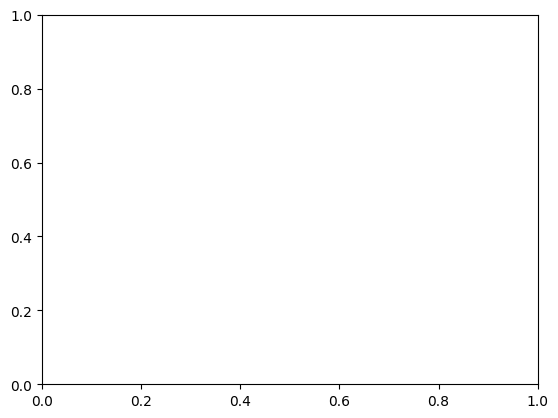

In [ ]:
ax =plot_decision_regions(X=X_data, y=np.array(y),clf=clf, legend=0)
ax.set_xlabel('data')
h=ax.get_legend_handles_labels()
ax.legend(h[0],['Covid', 'Norma','Viral Pneumonia'])

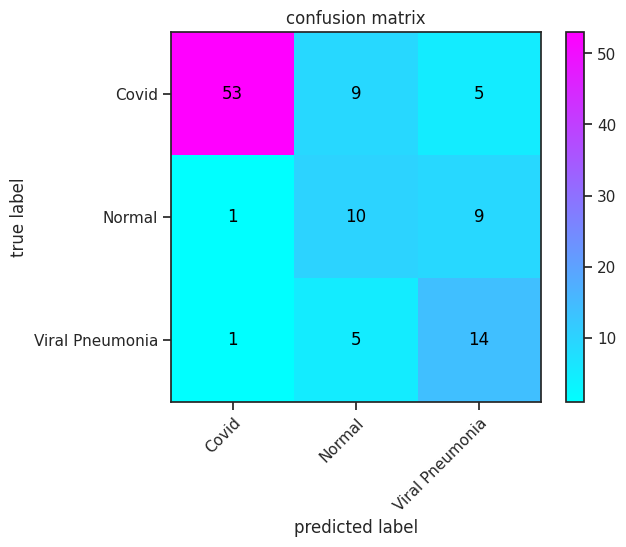

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sn
cm = confusion_matrix(y_test , y_hat)
plot_confusion_matrix(conf_mat=cm,class_names=class_names,colorbar=True,cmap= 'cool',fontcolor_threshold=2)
#plt.tight_layout()
sn.set_theme(style='ticks')
plt.title("confusion matrix")
#plt.savefig('P.png')
plt.show()


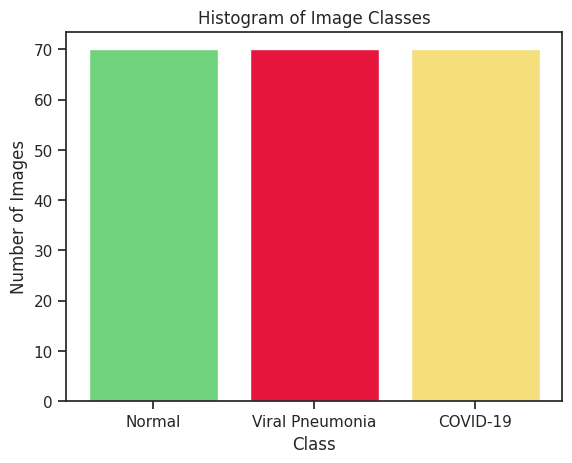

In [ ]:
import matplotlib.pyplot as plt

# ข้อมูลจำนวนรูปภาพในแต่ละคลาส
labels = ['Normal', 'Viral Pneumonia', 'COVID-19']
counts = [len(Normal), len(Viral_Pneumonia), len(Covidlist)]

# สร้าง histogram
plt.bar(labels, counts, color=['#6fd37d', '#e6153b', '#f5df7d'])
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Histogram of Image Classes')
plt.show()


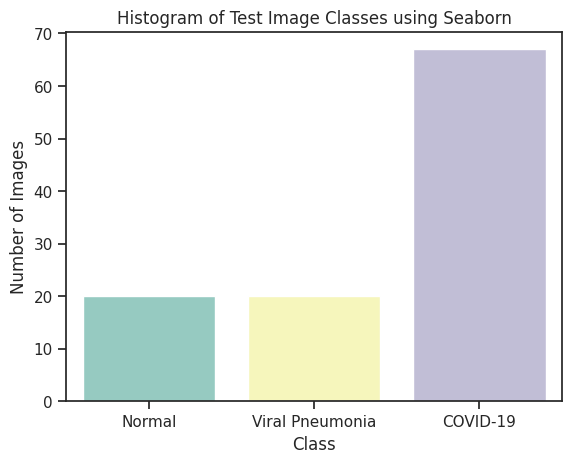

In [ ]:

import matplotlib.pyplot as plt

# ข้อมูลจำนวนรูปภาพในแต่ละคลาส (ที่ใช้ในการทดสอบ)
labels_test = ['Normal', 'Viral Pneumonia', 'COVID-19']
counts_test = [len(testNormal), len(testViral_Pneumonia), len(testCovid)]

# สร้าง DataFrame จากข้อมูล
import pandas as pd
Data = pd.DataFrame({'Class': labels_test, 'Count': counts_test})

# สร้าง histogram โดยใช้ Seaborn
sn.barplot(x='Class', y='Count', data=Data, palette='Set3')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Histogram of Test Image Classes using Seaborn')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87        67
           1       0.42      0.50      0.45        20
           2       0.50      0.70      0.58        20

    accuracy                           0.72       107
   macro avg       0.63      0.66      0.64       107
weighted avg       0.77      0.72      0.74       107

